<a href="https://colab.research.google.com/github/elenagonzalezrebollo/AprendizajeAutomatico/blob/main/AA_PRACTICA3_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AA_PRACTICA3_GRUPO_4

Daniel Alonso

Javier Arteaga

Marina Garrido

Elena González

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

- Density determined from underwater weighing
- Percent body fat from Siri's (1956) equation
- Age (years)
- Weight (lbs)
- Height (inches)
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm)

In [2]:
data = pd.read_csv('bodyfat.csv', encoding='latin-1')
data.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [4]:
#data=data.drop(['Density'], axis=1)


In [5]:
data.shape

(252, 15)

In [6]:
train_targets=data.BodyFat[:189]
test_targets=data.BodyFat[190:]
data=data.drop(['BodyFat'], axis=1)
train_data=data[:189]
test_data=data[190:]


#(train_data, train_targets), (test_data, test_targets) =  data

In [7]:
train_data.shape

(189, 14)

In [8]:
test_data.shape

(62, 14)

In [9]:
train_targets.shape

(189,)

In [10]:
test_targets.shape

(62,)

In [11]:
train_data[:1]

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1


In [12]:
# Los 3959 precios medios de los datos de test en miles de $
#test_targets

In [13]:
# 1. Separamos los datos de entrenamiento con los datos de test
#train_data = train_data[:3000]
#test_data = train_data[3001:]
#partial_train_targets = train_targets[:3000]
#partial_eval_train_targets = train_targets[3001:]

In [14]:
# Normalizamos basándonos en las características
##############################################
# Calculamos la media del primer eje de los datos de entrenamiento
mean = train_data.mean(axis=0)
print("##### Media de las 13 características de los datos de entrenamiento ##### ")
print(mean)
# A los datos de entrenamiento le restamos la media
train_data -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = train_data.std(axis=0)
print("##### Desviación estandar de las 13 características de los datos de entrenamiento ##### ")
print(std)
# A los datos de entrenamiento los dividimos por la desviación estándar
train_data /= std
#print("##### Datos de entrenamiento normalizados para la primera casa ##### ")
#print(train_data[0])

# ¡¡IMPORTANTE!!: USAMOS LA MEDIA Y LA DESVIACIÓN ESTANDAR DE LOS DATOS DE 
# ENTRENAMIENTO PARA NORMALIZAR EL SET DE DATOS DE LOS DATOS DE TEST 
test_data -= mean
test_data /= std
#print("##### Datos de test normalizados (de la primera casa) con la media y la desviación estándar de los datos de entrenamiento ##### ")
#print(test_data[0])

##### Media de las 13 características de los datos de entrenamiento ##### 
Density      1.056924
Age         41.888889
Weight     178.469841
Height      70.240741
Neck        37.895767
Chest      100.125926
Abdomen     91.725397
Hip         99.893122
Thigh       59.613757
Knee        38.515344
Ankle       23.143915
Biceps      32.289947
Forearm     28.694709
Wrist       18.173016
dtype: float64
##### Desviación estandar de las 13 características de los datos de entrenamiento ##### 
Density     0.018409
Age        12.009453
Weight     29.818886
Height      3.966228
Neck        2.492880
Chest       8.167412
Abdomen    10.598002
Hip         7.353296
Thigh       5.527727
Knee        2.333641
Ankle       1.793139
Biceps      3.056377
Forearm     2.015254
Wrist       0.932773
dtype: float64


In [15]:
train_data.shape[1]

14

In [16]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Porque necesitaremos instanciar el mismo modelo 
    # múltiples veces, usamos una función para construirlo
    model = models.Sequential()
    model.add(layers.Dense(90, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(90, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

In [17]:
# 2. Hacer aquí las particiones de los datos de entrenamiento
partial_train_data = train_data[:141]
partial_eval_train_data = train_data[142:]
partial_train_targets = train_targets[:141]
partial_eval_train_targets = train_targets[142:]

In [18]:
# 2. Entrenar el modelo con 25 épocas y un batch_size=1
mymodel = build_model()

In [19]:
history = mymodel.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=100, batch_size=8)

Epoch 1/100
18/18 [==============================] - 3s 61ms/step - loss: 347.1997 - mean_absolute_error: 17.0760 - val_loss: 195.3971 - val_mean_absolute_error: 12.6727
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 237.6599 - mean_absolute_error: 13.6130 - val_loss: 110.4506 - val_mean_absolute_error: 9.1652
Epoch 3/100
18/18 [==============================] - 0s 15ms/step - loss: 155.6261 - mean_absolute_error: 10.7643 - val_loss: 78.2049 - val_mean_absolute_error: 7.0477
Epoch 4/100
18/18 [==============================] - 0s 17ms/step - loss: 113.3449 - mean_absolute_error: 8.8507 - val_loss: 75.8031 - val_mean_absolute_error: 6.7610
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 91.5363 - mean_absolute_error: 7.7766 - val_loss: 68.4451 - val_mean_absolute_error: 6.4754
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 74.7086 - mean_absolute_error: 6.7374 - val_loss: 59.2292 - val_mean_absolute_error: 6.

In [20]:
mae_history = history.history['val_mean_absolute_error']
accuracy= np.mean(mae_history)
accuracy

2.0040707105398177

In [21]:
mse_history = history.history['val_loss']

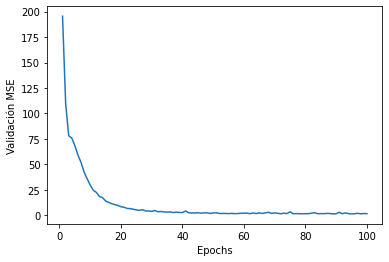

In [22]:
# 3. Confrontar en una gráfica de épocas en el eje de abcisas contra pérdida (MSE) en
# el eje de ordenadas
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

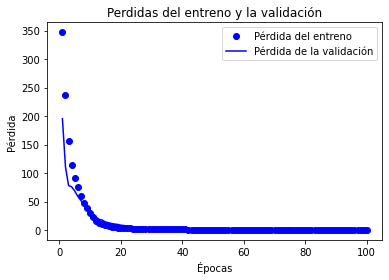

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

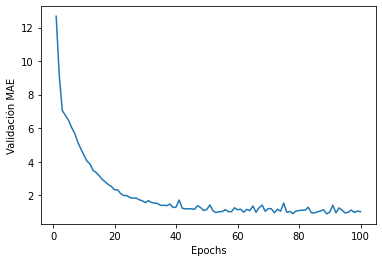

In [24]:
# 4. Confrontar en una gráfica de épocas en el eje de abcisas contra la métrica de 
# error absoluto medio (MAE) 
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

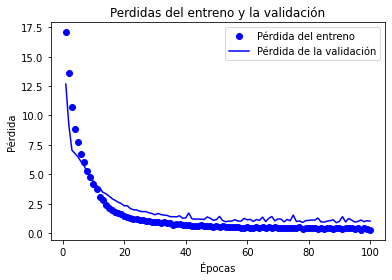

In [25]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [26]:
# 5. Entrenar de nuevo el modelo el número de épocas adecuado para evitar overfitting
mymodel2 = build_model()
history2 = mymodel2.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=20, batch_size=1)

Epoch 1/20
141/141 [==============================] - 1s 3ms/step - loss: 224.4523 - mean_absolute_error: 12.8009 - val_loss: 86.9571 - val_mean_absolute_error: 7.1507
Epoch 2/20
141/141 [==============================] - 0s 2ms/step - loss: 95.7981 - mean_absolute_error: 6.7080 - val_loss: 51.3310 - val_mean_absolute_error: 5.6116
Epoch 3/20
141/141 [==============================] - 0s 2ms/step - loss: 50.4039 - mean_absolute_error: 4.7078 - val_loss: 31.7588 - val_mean_absolute_error: 4.5590
Epoch 4/20
141/141 [==============================] - 0s 2ms/step - loss: 23.2293 - mean_absolute_error: 3.2178 - val_loss: 19.7434 - val_mean_absolute_error: 3.5727
Epoch 5/20
141/141 [==============================] - 0s 2ms/step - loss: 12.8470 - mean_absolute_error: 2.5044 - val_loss: 14.8688 - val_mean_absolute_error: 3.1330
Epoch 6/20
141/141 [==============================] - 0s 2ms/step - loss: 7.7664 - mean_absolute_error: 2.0367 - val_loss: 9.9963 - val_mean_absolute_error: 2.6122
Epoc

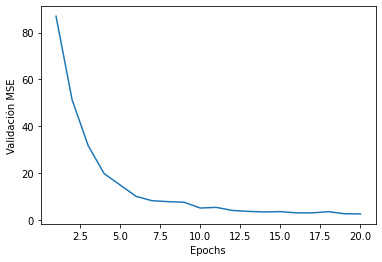

In [27]:
mae_history2 = history2.history['val_mean_absolute_error']
mse_history2 = history2.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history2) + 1), mse_history2)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

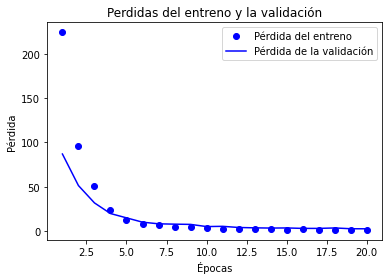

In [28]:
import matplotlib.pyplot as plt

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

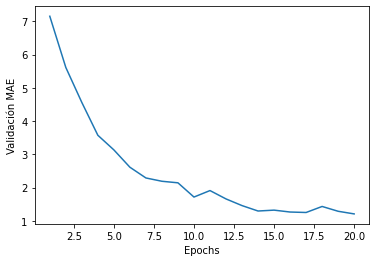

In [29]:

import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history2) + 1), mae_history2)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

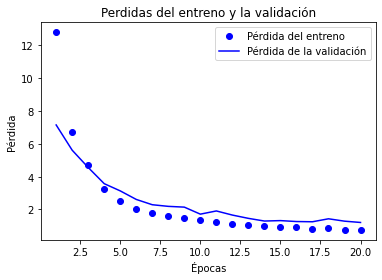

In [30]:
import matplotlib.pyplot as plt

loss = history2.history['mean_absolute_error']
val_loss = history2.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [31]:
import numpy as np

# k= 4 particiones
k = 4
num_val_samples = len(train_data) // k # 404//4=101
print("num_val_samples", num_val_samples)
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_data),"]")
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evalua el modelo sobre los datos de validación
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_val_samples 47
processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 47 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 47 : 189 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 47 : 94 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 47 ]U[ 94 : 189 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 94 : 141 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 94 ]U[ 141 : 189 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 141 : 188 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 141 ]U[ 188 : 189 ]


In [32]:
all_scores

[1.339657187461853, 0.9493018388748169, 0.7898162007331848, 0.8493392467498779]

In [33]:
np.mean(all_scores)

0.9820286184549332

In [34]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [35]:
num_epochs = 50
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición # k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de todas la demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_data),"]")
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 47 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 47 : 189 ]


processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 47 : 94 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 47 ]U[ 94 : 189 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 94 : 141 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 94 ]U[ 141 : 189 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 141 : 188 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 141 ]U[ 188 : 189 ]


In [36]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

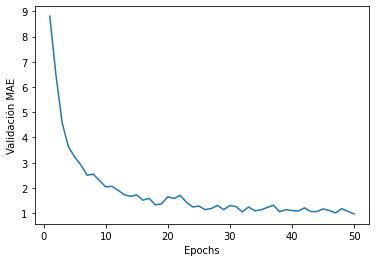

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

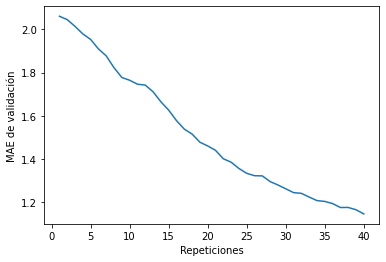

In [38]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Repeticiones')
plt.ylabel('MAE de validación')
plt.show()

In [39]:
# Obtenemos un modelo compilado nuevo
model = build_model()
# Lo entrenamos en todos los datos.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 6ms/step - loss: 2.2824 - mean_absolute_error: 1.1231


In [40]:
test_mae_score

1.1231145858764648